![logo](https://drive.google.com/uc?export=view&id=1QJ9PAT9q-Ksv_Vs_pLXtLHxjjV-9FMTz)



_Prepared by_  [**Noureldin Mohamed Abdelsalam**](mailto:s-noureldin.hamedo@zewailcity.edu.eg)

# Imports

In [1]:
import pandas as pd
import tensorflow as tf
import requests
import numpy as np
import matplotlib.pyplot as plt
import time
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image as image_pre
from tensorflow import keras
#from google.colab import drive
from PIL import Image
from io import BytesIO
from skimage.transform import resize


In [48]:
import PySimpleGUI as sg

# Define the layout of the GUI
layout = [
    [sg.Text('Upload Model File:'), sg.Input(key='_MODEL_FILE_'), sg.FileBrowse(file_types=(('H5 Files', '*.h5'),))],
    [sg.Text('Select CSV File:'), sg.Input(key='_CSV_FILE_'), sg.FileBrowse(file_types=(('CSV Files', '*.csv'),))],
    [sg.Button('Submit'), sg.Button('Cancel')]
]

# Create the GUI window
window = sg.Window('Model Uploader', layout)

# Loop to handle user events
while True:
    event, values = window.read()
    
    # If the user closes the window or clicks the Cancel button, exit the loop
    if event == sg.WIN_CLOSED or event == 'Cancel':
        break
    
    # If the user clicks the Submit button, handle the files
    if event == 'Submit':
        model_file = values['_MODEL_FILE_']
        csv_file = values['_CSV_FILE_']
        
        # TODO: Handle the uploaded files
        
        # Show a message box to confirm that the files were uploaded
        sg.popup(f"Model file {model_file} and CSV file {csv_file} uploaded successfully!")
        
        # Reset the file inputs
        window['_MODEL_FILE_'].update('')
        window['_CSV_FILE_'].update('')
        break
    
# Close the GUI window
window.close()


In [4]:
# read csv file into dataframe
df = pd.read_csv(csv_file)

# keep only 'Product Image' and 'Additional Images & Videos' columns
df = df[['Product Image', 'Additional Images & Videos']]
df.head(10)

,Product Image,Additional Images & Videos
0,https://global-uploads.webflow.com/61e6c82e968...,https://global-uploads.webflow.com/61e6c82e968...
1,https://global-uploads.webflow.com/61e6c82e968...,https://global-uploads.webflow.com/61e6c82e968...
2,https://global-uploads.webflow.com/61e6c82e968...,https://global-uploads.webflow.com/61e6c82e968...
3,https://global-uploads.webflow.com/61e6c82e968...,https://global-uploads.webflow.com/61e6c82e968...
4,https://global-uploads.webflow.com/61e6c82e968...,https://global-uploads.webflow.com/61e6c82e968...
5,https://global-uploads.webflow.com/61e6c82e968...,https://global-uploads.webflow.com/61e6c82e968...
6,https://global-uploads.webflow.com/61e6c82e968...,https://global-uploads.webflow.com/61e6c82e968...
7,https://global-uploads.webflow.com/61e6c82e968...,https://global-uploads.webflow.com/61e6c82e968...
8,https://global-uploads.webflow.com/61e6c82e968...,https://global-uploads.webflow.com/61e6c82e968...
9,https://global-uploads.webflow.com/61e6c82e968...,https://global-uploads.webflow.com/61e6c82e968...


# Importing the model

In [5]:
# Load the model from the h5 file
model = keras.models.load_model(model_file)

In [7]:
image_path = df.iloc[0]['Product Image']
image_path

'https://global-uploads.webflow.com/61e6c82e968c431b6d435118/6374b2109f9cd1cc565ebde0_IYO_4.jpg'

In [8]:
# Load the image from the URL
response = requests.get(image_path)
img = Image.open(BytesIO(response.content))

# Convert the image to a numpy array
img = np.array(img)

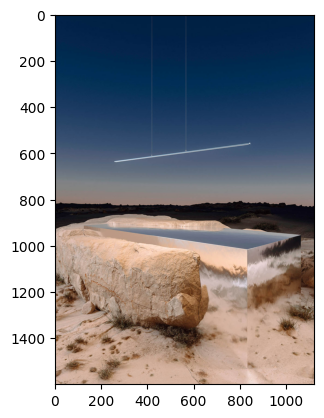

In [9]:
plt.imshow(img)
plt.show()

In [11]:
plot_model(model, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [12]:
# Print a summary of the model architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_3 (Sequential)   (None, 2)                 128300    
                                                                 
Total params: 538,508
Trainable params: 524,428
Non-trainable params: 14,080
_________________________________________________________________


In [13]:

# Preprocess the image
resized_img = resize(img, (224, 224), anti_aliasing=True)
resized_img = np.expand_dims(resized_img, axis=0) # Add a batch dimension

In [14]:
# Make the prediction
prediction = model.predict(resized_img)
if prediction[0][0] > prediction[0][1]:
    print("The image is 0 (Product Image)")
else:
    print("The image is 1 (Application Image)")

1/1 [==============================] - 1s 585ms/step
The image is 1 (Application Image)


In [15]:
image_path = df.iloc[0]['Additional Images & Videos']
# Split the string into a list of links
links = image_path.split('; ')

# Convert the list to a numpy array
links_array = np.array(links)
links_array

array(['https://global-uploads.webflow.com/61e6c82e968c431b6d435118/6374b2109f9cd1cc565ebde0_IYO_4.jpg',
       'https://global-uploads.webflow.com/61e6c82e968c431b6d435118/62eb811c1b50c35327257969_IYO_3.jpg',
       'https://global-uploads.webflow.com/61e6c82e968c431b6d435118/62dfb5d0a34b9f3bd50dc395_IYO_01.jpg'],
      dtype='<U95')

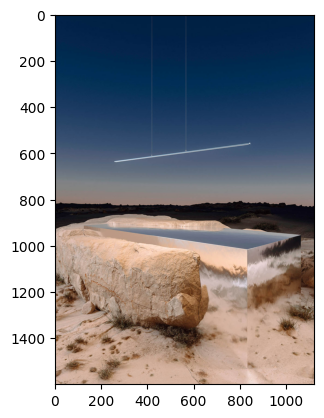

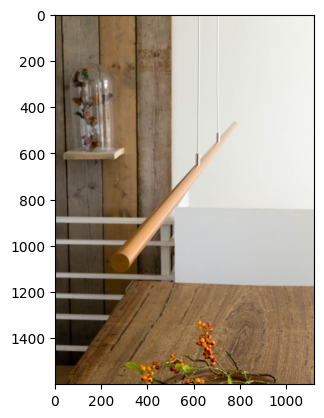

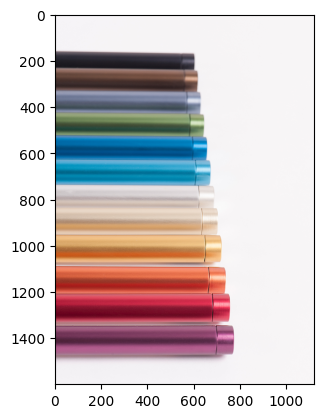

In [16]:
# Convert the image to a numpy array
for img_path in links_array:
  response = requests.get(img_path)
  img = Image.open(BytesIO(response.content))
  img = np.array(img)
  plt.imshow(img)
  plt.show()

# Detect image Type

In [50]:
# Define a function to detect the image type
def detect_image_type(image_path, model):
    start_time = time.time()
    # Load the image from the URL
    response = requests.get(image_path)
    img = Image.open(BytesIO(response.content))
    # Convert the image to a numpy array and preprocess it
    resized_img = np.array(img.resize((224, 224), resample=Image.BILINEAR)) / 255.0
    resized_img = np.expand_dims(resized_img, axis=0) # Add a batch dimension
    # Make the prediction
    prediction = model.predict(resized_img)
    end_time = time.time()
    if prediction[0][0] > prediction[0][1]:
        result = "Product Image"
    else:
        result = "Application Image"
    detection_time = end_time - start_time
    return result, detection_time

# Example usage
image_path = df.iloc[4]['Product Image']
result, detection_time = detect_image_type(image_path, model)
print(f"The image is {result}. Detection time: {detection_time:.4f} seconds.")

1/1 [==============================] - 0s 30ms/step
The image is Product Image. Detection time: 0.5723 seconds.


# Multi-Threading

In [51]:
import threading

# Define a function that will be executed by each thread
def classify_image(image_url, model):
    image_type, detection_time = detect_image_type(image_url, model)
    print(f"Image at {image_url} is {image_type} ({detection_time:.3f} s)")

def multiThread(image_urls,model):
    # Create a list to hold the threads
    threads = []
    start_time = time.time()
    # Create a thread for each image URL and start it
    for image_url in image_urls:
        thread = threading.Thread(target=classify_image, args=(image_url, model))
        thread.start()
        threads.append(thread)

    # Wait for all threads to finish
    for thread in threads:
        thread.join()
    end_time = time.time()
    detection_time = end_time - start_time
    return detection_time

# Analyzing time factor

In [52]:
image_urls = [
    df.iloc[0]['Product Image'],
    df.iloc[1]['Product Image'],
    df.iloc[2]['Product Image'],
    df.iloc[3]['Product Image'],
    df.iloc[4]['Product Image'],
    df.iloc[5]['Product Image'],
    df.iloc[6]['Product Image'],
    df.iloc[7]['Product Image'],
    df.iloc[8]['Product Image'],
    df.iloc[9]['Product Image'],
    df.iloc[10]['Product Image'],
    df.iloc[11]['Product Image'],
    df.iloc[12]['Product Image'],
    df.iloc[13]['Product Image'],
    df.iloc[14]['Product Image'],
    df.iloc[15]['Product Image'],
    df.iloc[16]['Product Image'],
]

## Sequential

In [53]:
total_time=0
for im in image_urls:
    start_time = time.time()
    detect_image_type(image_path, model)
    end_time= time.time()
    detection_time = end_time - start_time
    total_time+=detection_time
    print(detection_time)

print(total_time)

1/1 [==============================] - 0s 20ms/step
0.4621574878692627
1/1 [==============================] - 0s 19ms/step
0.47542762756347656
1/1 [==============================] - 0s 30ms/step
0.5102746486663818
1/1 [==============================] - 0s 31ms/step
0.5079946517944336
1/1 [==============================] - 0s 23ms/step
0.4771702289581299
1/1 [==============================] - 0s 23ms/step
0.4975278377532959
1/1 [==============================] - 0s 27ms/step
0.5142552852630615
1/1 [==============================] - 0s 23ms/step
0.49555277824401855
1/1 [==============================] - 0s 20ms/step
0.4743967056274414
1/1 [==============================] - 0s 22ms/step
0.4945189952850342
1/1 [==============================] - 0s 24ms/step
0.4859127998352051
1/1 [==============================] - 0s 22ms/step
0.4738175868988037
1/1 [==============================] - 0s 22ms/step
0.48328328132629395
1/1 [==============================] - 0s 23ms/step
0.5089337825775146
1/1

In [54]:
avg_time_per_image=total_time/16
avg_time_per_image

0.5185346156358719

## MultiThreading

In [55]:
detection_time=multiThread(image_urls,model)

1/1 [==============================] - 0s 21ms/step
Image at https://global-uploads.webflow.com/61e6c82e968c431b6d435118/63fdef350f567292d53f86d7_PIXEL_HANG.webp is Application Image (0.479 s)
1/1 [==============================] - 0s 26ms/step
Image at https://global-uploads.webflow.com/61e6c82e968c431b6d435118/6374b2109f9cd1cc565ebde0_IYO_4.jpg is Application Image (0.941 s)
1/1 [==============================] - 0s 26ms/step
Image at https://global-uploads.webflow.com/61e6c82e968c431b6d435118/63fdef2d8dc4be52ddd6aa64_IYO_Q.webp is Application Image (0.997 s)
1/1 [==============================] - 0s 27ms/step
Image at https://global-uploads.webflow.com/61e6c82e968c431b6d435118/63fdef358b58a769ff5ac340_SPOETNIK.webp is Application Image (1.146 s)
1/1 [==============================] - ETA: 0sImage at https://global-uploads.webflow.com/61e6c82e968c431b6d435118/63fdef2d7a427c6ddac0a81d_JOYFUL.webp is Application Image (2.624 s)
Image at https://global-uploads.webflow.com/61e6c82e968c43

In [56]:
print(f'Total time taken to apply the model on 16 images is {total_time} seconds wheres multi-threading those 16 images took {detection_time} seconds')

Total time taken to apply the model on 16 images is 8.29655385017395 seconds wheres multi-threading those 16 images took 2.9420695304870605 seconds


In [57]:
time_per_image=detection_time/16
time_per_image

0.18387934565544128

The number of threads you can run depends on several factors such as the hardware resources available on your machine, the complexity of the tasks each thread is performing, and the thread-safety of the code.

In general, creating too many threads can lead to resource contention, which can result in degraded performance or even system crashes. It's a good practice to limit the number of threads to a reasonable number based on your hardware resources and the tasks each thread is performing.

A good rule of thumb is to start with a small number of threads, monitor system performance, and gradually increase the number of threads until the desired performance is achieved or until performance starts to degrade.

`For a 12-core 4.9 GHz CPU, it can theoretically handle up to 24 threads if it supports hyper-threading (2 threads per physical core)`